Jupyter notebook attached to quickly visualise code results

In [1]:
#first run these dependencies to allow cells below to run
import numpy as np
from matplotlib import pyplot as plt
import resource.pulseshape as pulse
import resource.operators as op

In [42]:
#define numerical parameters
b2 = -0.002 #in ps^2m^-1
stepsize = 20 #in meters
gamma = 0.004
steps = 100 #z steps - s.t. total length = steps * stepsize in meters
timeNum = 1024 #number of time samples
t1 = -10 #start time in ps
t2 = 10 #end time in ps
samplingRate = timeNum/(t2-t1) #samples per picosecond
t = np.linspace(t1,t2,timeNum)
gaussPulseInitial = pulse.GaussianPulse(t,1)

Below, example output using split-step fourier method

(-10.0, 10.0)

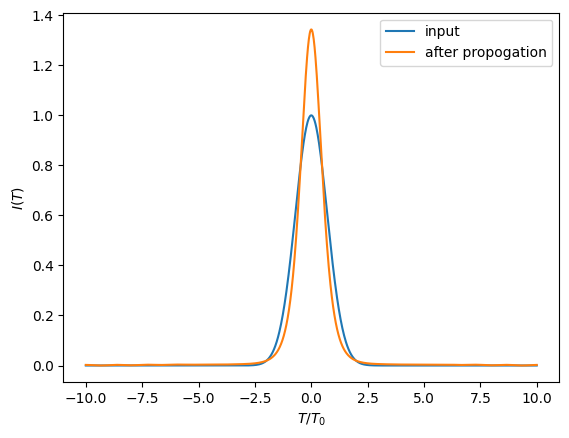

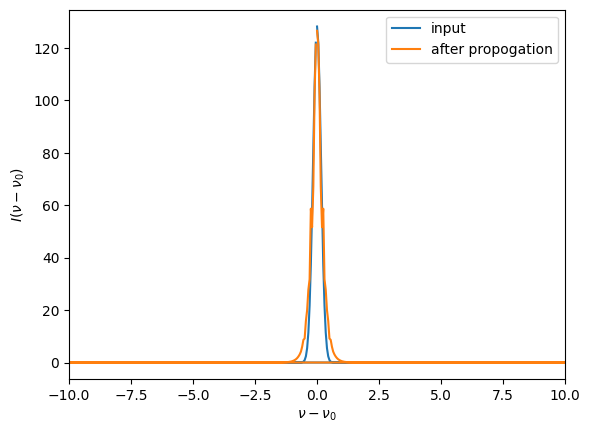

In [43]:
#apply gvd to test pulse 
gaussPulse = op.resolveBasicGVD(b2,stepsize,gaussPulseInitial,samplingRate=samplingRate)
for i in range(steps):
    gaussPulse = op.resolveBasicGVD(b2,stepsize,gaussPulse,samplingRate=samplingRate)
    gaussPulse = np.multiply(gaussPulse,op.SymSplitStepNL(gamma,gaussPulse,stepsize))
    gaussPulse = op.resolveBasicGVD(b2,stepsize,gaussPulse,samplingRate=samplingRate)

initialFT = np.fft.fft(gaussPulseInitial)
propFT = np.fft.fft(gaussPulse)
freqs = np.fft.fftfreq(timeNum,1/samplingRate)
#plot results
plt.plot(t,np.square(gaussPulseInitial),label = "input")
plt.plot(t,np.square(np.abs(gaussPulse)),label = "after propogation")
plt.legend(loc="best")
plt.ylabel(r"$I(T)$")
plt.xlabel(r"$T/T_0$")
plt.figure()
plt.plot(freqs,np.abs(initialFT),label = "input")
plt.plot(freqs,np.abs(propFT),label = "after propogation")
plt.legend(loc="best")
plt.ylabel(r"$I(\nu - \nu_0)$")
plt.xlabel(r"$\nu - \nu_0$")
plt.xlim(-10,10)

Test output for RK method below

(-10.0, 10.0)

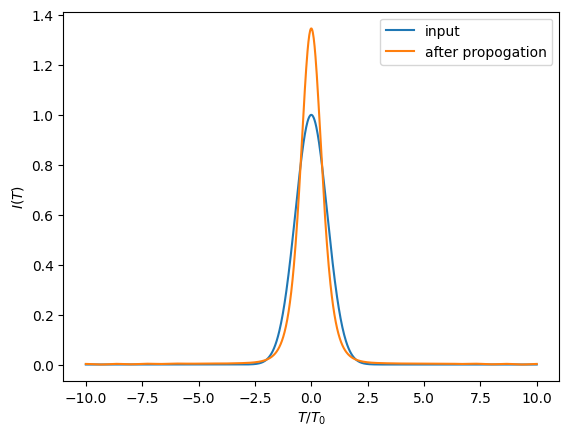

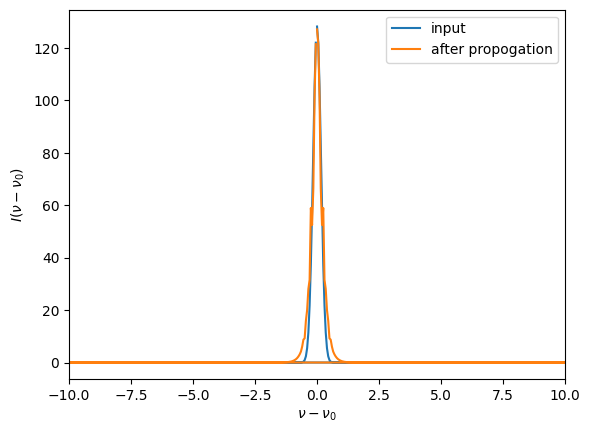

In [44]:
gaussPulse = op.BasicRK4IP(gaussPulseInitial,b2,gamma,stepsize,samplingRate)
for i in range(steps-1):
    gaussPulse = op.BasicRK4IP(gaussPulse,b2,gamma,stepsize,samplingRate)

initialFT = np.fft.fft(gaussPulseInitial)
propFT = np.fft.fft(gaussPulse)
freqs = np.fft.fftfreq(timeNum,1/samplingRate)
#plot results
plt.plot(t,np.square(gaussPulseInitial),label = "input")
plt.plot(t,np.square(np.abs(gaussPulse)),label = "after propogation")
plt.legend(loc="best")
plt.ylabel(r"$I(T)$")
plt.xlabel(r"$T/T_0$")
plt.figure()
plt.plot(freqs,np.abs(initialFT),label = "input")
plt.plot(freqs,np.abs(propFT),label = "after propogation")
plt.legend(loc="best")
plt.ylabel(r"$I(\nu - \nu_0)$")
plt.xlabel(r"$\nu - \nu_0$")
plt.xlim(-10,10)